<a href="https://colab.research.google.com/github/denpetrov/01_03_natural-language-processing-tensorflow/blob/master/w03_Course_4_Week_3_Lesson_1c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Layer GRU

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [0]:
# If the tf.__version__ is 1.x, please run this cell
!pip install tensorflow==2.0.0-beta0

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


W0804 13:13:16.359039 140296540018560 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [0]:
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

W0804 13:13:31.454205 140296540018560 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


391/391 [==============================] - 471s 1s/step - loss: 0.4502 - accuracy: 0.7829 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 419s 1s/step - loss: 0.2247 - accuracy: 0.9170 - val_loss: 0.3065 - val_accuracy: 0.8781
Epoch 3/10
391/391 [==============================] - 415s 1s/step - loss: 0.1697 - accuracy: 0.9370 - val_loss: 0.3338 - val_accuracy: 0.8716
Epoch 4/10
391/391 [==============================] - 400s 1s/step - loss: 0.1381 - accuracy: 0.9502 - val_loss: 0.3628 - val_accuracy: 0.8708
Epoch 5/10
391/391 [==============================] - 392s 1s/step - loss: 0.1122 - accuracy: 0.9618 - val_loss: 0.4751 - val_accuracy: 0.8482
Epoch 6/10
391/391 [==============================] - 387s 990ms/step - loss: 0.0925 - accuracy: 0.9680 - val_loss: 0.5009 - val_accuracy: 0.8624
Epoch 7/10
391/391 [==============================] - 383s 980ms/step - loss: 0.0728 - accuracy: 0.9770 - val_loss: 0.5505 - val_accuracy: 0.8

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

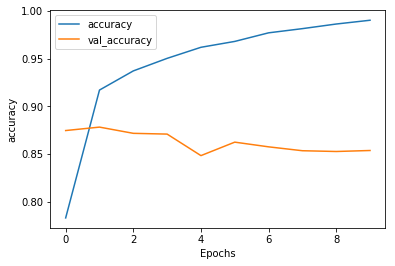

In [11]:
plot_graphs(history, 'accuracy')

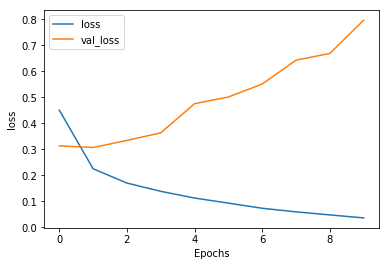

In [12]:
plot_graphs(history, 'loss')